In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1000, 
    centers=3, 
    n_features=3, 
    cluster_std=1.2, 
    random_state=42
)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.generative import GDA
import numpy as np

model = GDA()
model.fit(X, y)
predictions = model.predict(X)

print(f"Accuracy: {np.mean(predictions == y) * 100}%")

Accuracy: 100.0%


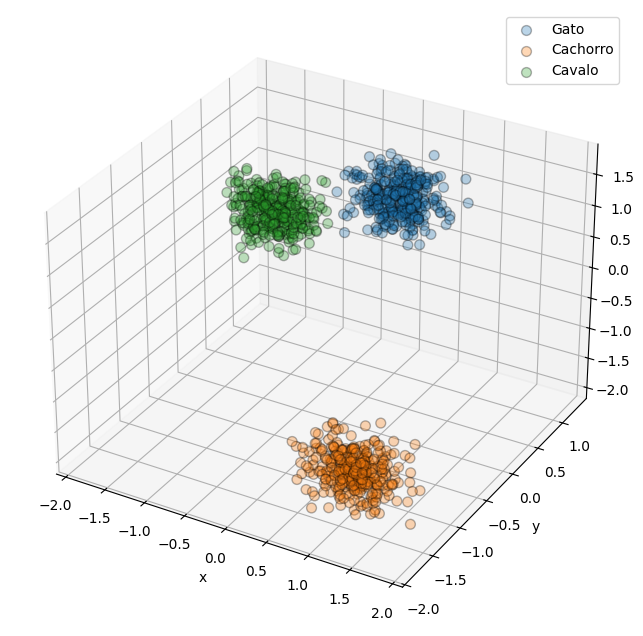

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

classes_labels = ["Gato", "Cachorro", "Cavalo"]

for i, class_label in enumerate(classes_labels):
    ax.scatter(X[y == i, 0],
               X[y == i, 1],
               X[y == i, 2], 
               label=class_label, 
               edgecolors='k',
               s=50,
               alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

In [5]:
gda_scratch = GDA()
gda_scratch.fit(X, y, class_labels=classes_labels)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(classes_labels)

gda_scikit = LinearDiscriminantAnalysis(store_covariance=True)
gda_scikit.fit(X, y)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


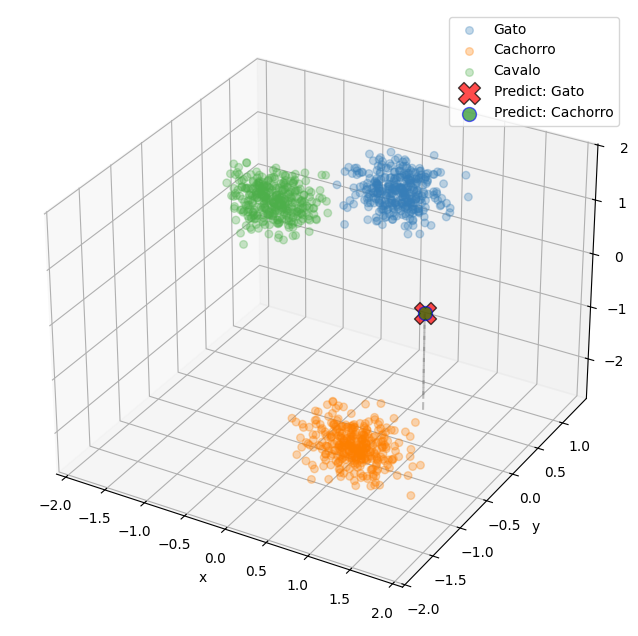

In [6]:
point_gda = scaler.transform(np.array([0.5, 5.5, -3.2]).reshape(1,-1))[0]
result_gda = gda_scratch.predict(point_gda)

point_sklearn = scaler.transform(np.array([0.5, 5.5, -3.2]).reshape(1,-1))[0]
result_sklearn = le.inverse_transform(gda_scikit.predict(point_sklearn.reshape(1,-1)))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#377eb8', '#ff7f00', '#4daf4a']

for i, name in enumerate(classes_labels):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], 
               color=colors[i], label=name, alpha=0.3, s=30)

ax.scatter(point_gda[0], point_gda[1], point_gda[2], 
           color='red', marker='X', s=250, label=f'Predict: {result_gda}', edgecolors='black', alpha=0.7)

ax.plot([point_gda[0], point_gda[0]], [point_gda[1], point_gda[1]], 
        [ax.get_zlim()[0], point_gda[2]], color='gray', linestyle='--', alpha=0.5)

ax.scatter(point_sklearn[0], point_sklearn[1], point_sklearn[2], 
           color='green', marker='o', s=100, label=f'Predict: {result_sklearn[0]}', edgecolors='blue', alpha=0.6)

ax.plot([point_sklearn[0], point_sklearn[0]], [point_sklearn[1], point_sklearn[1]], 
        [ax.get_zlim()[0], point_sklearn[2]], color='gray', linestyle='--', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

In [7]:
def predict_plot_3d(predict_value = None, X = X, y = y):
    predict_value = np.ravel(predict_value)
    result_gda = gda_scratch.predict(predict_value)
    result_sklearn = le.inverse_transform(gda_scikit.predict(predict_value.reshape(1,-1)))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['#377eb8', '#ff7f00', '#4daf4a', "#f81647"]

    for i, name in enumerate(classes_labels):
        ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], 
                color=colors[i], label=name, alpha=0.3, s=30)

    ax.scatter(predict_value[0], predict_value[1], predict_value[2], 
            color='purple', marker='X', s=250, label=f'Predict: {result_gda}', edgecolors='black', alpha=0.7)

    ax.plot([predict_value[0], predict_value[0]], [predict_value[1], predict_value[1]], 
            [ax.get_zlim()[0], predict_value[2]], color='gray', linestyle='--', alpha=0.5)

    ax.scatter(predict_value[0], predict_value[1], predict_value[2], 
            color='pink', marker='o', s=100, label=f'Predict: {result_sklearn[0]}', edgecolors='blue', alpha=0.6)

    ax.plot([predict_value[0], predict_value[0]], [predict_value[1], predict_value[1]], 
            [ax.get_zlim()[0], predict_value[2]], color='gray', linestyle='--', alpha=0.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
    plt.show()

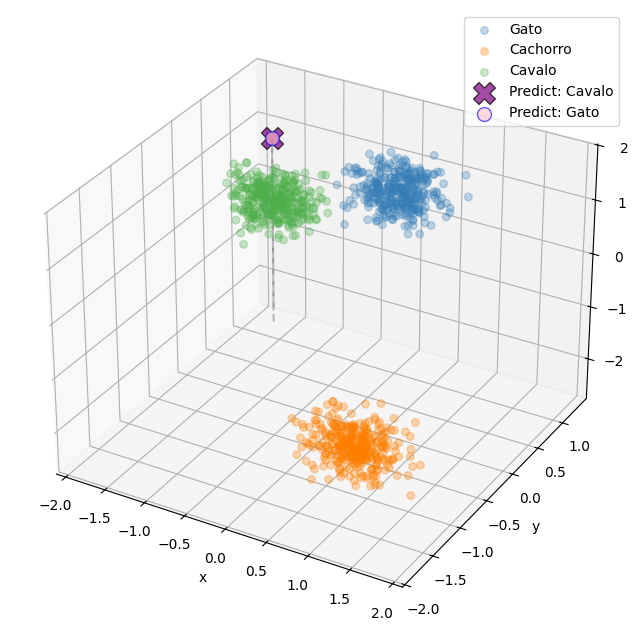

In [8]:
predict_plot_3d(predict_value=scaler.transform(np.array([-10.5, 10.5, 5.5]).reshape(1,-1))[0])

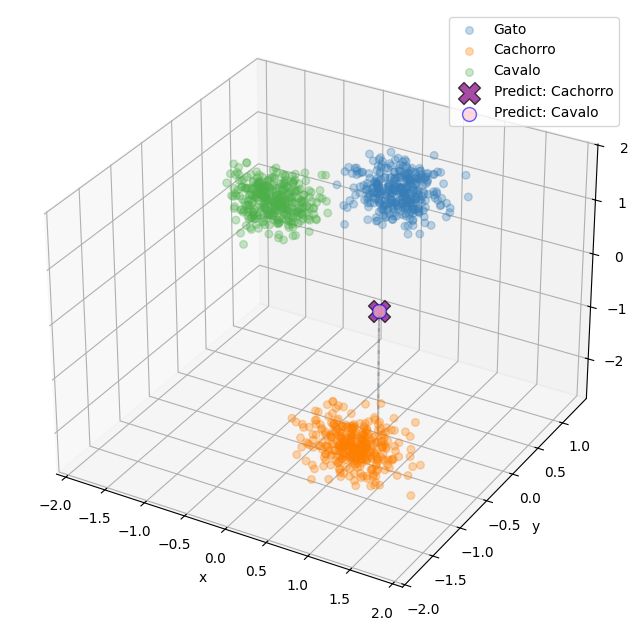

In [9]:
predict_plot_3d(predict_value=scaler.transform(np.array([0.2, 0.1, 0.3]).reshape(1,-1))[0])

In [10]:
print(f"""scratch: {gda_scratch.covariance}
scikit: {gda_scikit.covariance_}""")

scratch: [[ 0.06514525 -0.00133943 -0.00046074]
 [-0.00133943  0.02610336 -0.00039958]
 [-0.00046074 -0.00039958  0.0573117 ]]
scikit: [[ 0.06514525 -0.00133943 -0.00046074]
 [-0.00133943  0.02610336 -0.00039958]
 [-0.00046074 -0.00039958  0.0573117 ]]


In [11]:
import scipy as sp

def debug_mahalanobis(X_point, model):
    inv_cov = np.linalg.inv(model.covariance)
    for i, label in enumerate(model.class_labels):
        mean = model.means[i]
        dist = sp.spatial.distance.mahalanobis(X_point, mean, inv_cov)
        print(f"Distance for {label}: {dist:.4f}")

new_point_scaled = scaler.transform(np.array([0.2, 0.1, 0.3]).reshape(1,-1))[0]
debug_mahalanobis(new_point_scaled, gda_scratch)

Distance for Gato: 8.7892
Distance for Cachorro: 8.4742
Distance for Cavalo: 9.9300


In [12]:
gda_scratch.predict(new_point_scaled)

'Cachorro'